# Testcell Zoo

## Introduction

This notebook demonstrates practical use cases for `%%testcell`. Each example is self-contained and can be run independently after loading the fixtures.

### install

First of all, install and import `testcell`.

In [1]:
!pip install testcell

In [2]:
# Install dependecies used in this notebook
!pip install numpy pandas matplotlib

In [3]:
import testcell

### Fixtures

Common objects used throughout the examples:

In [4]:
# Simple variable
global_variable = "I'm a global variable"

# Simple list
global_list = [1, 2, 3, 5, 7, 11, 13]

# Simple function
def global_function(n):
    return n*2

# Simple class
class GlobalClass:
    def one(self):
        return 37
    
    def two(self):
        return "method of global class"

## Documentation

Individual options and their behavior:

### option: `verbose`
Shows the generated wrapper function before execution.

In [5]:
%%testcell verbose
global_function(3) * 2

```python
### BEGIN
def _test_cell_():
	
	return global_function(3) * 2 # %%testcell
try:
	_ = _test_cell_()
finally:
	del _test_cell_
_ # This will be added to global scope
### END
```

12

### option `dryrun`
Shows the wrapper code without executing it.

In [6]:
%%testcell dryrun
global_function(3) * 2

```python
### BEGIN
def _test_cell_():
	
	return global_function(3) * 2 # %%testcell
try:
	_ = _test_cell_()
finally:
	del _test_cell_
if _ is not None: display(_)
### END
```

### option `skip`
Skips cell execution entirely.

In [7]:
%%testcell skip
raise ValueError("This won't execute")

ℹ️ This cell has been skipped

### option `banner`
Displays a visual marker at the top of output.

In [8]:
%%testcell banner
global_function(3)

🟡 testcell

6

### option `noglobals` (or `%%testcelln`)
Executes with zero access to notebook globals - only `__builtins__` available.

In [9]:
%%testcelln
try:
    global_function(3)  # This will fail
except NameError:
    print('global_function not available here')

global_function not available here


In [10]:
%%testcell noglobals
try:
    global_function(3)  # This will fail
except NameError:
    print('global_function not available here')

global_function not available here


### option `(inputs)` syntax
Explicitly control what enters in the isolated context.

In [11]:
%%testcelln (global_list)
[x * 2 for x in global_list]

[2, 4, 6, 10, 14, 22, 26]

In [12]:
%%testcelln (GlobalClass)
GlobalClass().one()

37

### option `(inputs)->(outputs)` syntax
Explicitly control what enters and exits the isolated context.

In [13]:
%%testcelln (global_list)->(double_list)
double_list = [x * 2 for x in global_list]
double_list

[2, 4, 6, 10, 14, 22, 26]

In [14]:
print(double_list) # double_list now exists in the global namespace
del double_list # cleanin it up

[2, 4, 6, 10, 14, 22, 26]


### option `debug`
Shows wrapper code AND globals update operations.

In [15]:
%%testcelln (global_variable)->(new_var) debug
new_var = global_variable.upper()
new_var

```python
### BEGIN
def _test_cell_():
	global new_var
	new_var = global_variable.upper()
	return new_var # %%testcell
try:
	_ = _test_cell_()
finally:
	del _test_cell_
if _ is not None: display(_)
### END
```

"I'M A GLOBAL VARIABLE"

```python
### GLOBALS UPDATE CODE:
global new_var; new_var=locals()["new_var"]
###
```

In [16]:
del new_var

## Use Case Scenarios

### Basic Isolation

#### Testing without pollution

Test a function with various inputs without cluttering globals with test values.

In [17]:
%%testcell
import numpy as np

# Test global_function with different inputs
test_cases = [1, 5, 10, 100]
results = [global_function(x) for x in test_cases]
print(f"Results: {results}")
np.mean(results)  # test_cases and results don't leak to globals

Results: [2, 10, 20, 200]


np.float64(58.0)

#### Quick code prototyping

Experiment with different approaches without commitment.

In [18]:
%%testcell
import pandas as pd

# Trying different ways to process global_list
approach_1 = pd.Series(global_list).rolling(3).mean().dropna()
approach_2 = [sum(global_list[i:i+3])/3 for i in range(len(global_list)-2)]
print(f"Approach 1: {approach_1.tolist()}")
print(f"Approach 2: {approach_2}")
# Nothing saved - decide later which approach to keep

Approach 1: [2.0, 3.3333333333333335, 5.0, 7.666666666666667, 10.333333333333334]
Approach 2: [2.0, 3.3333333333333335, 5.0, 7.666666666666667, 10.333333333333334]


#### Stack Overflow snippet testing

Test SO answers in isolation to catch hidden dependencies.

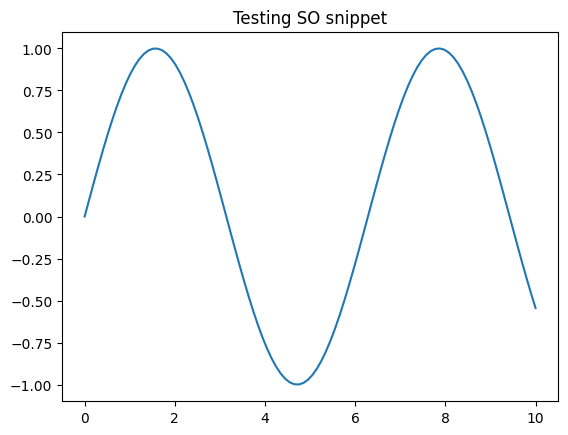

In [19]:
%%testcelln
import matplotlib.pyplot as plt
import numpy as np

# SO snippet for quick visualization
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title("Testing SO snippet")
plt.show()  # Completely isolated - no globals needed or leaked

#### Safe LLM suggested code experimentation

Try code from ChatGPT/Claude in complete isolation - verify it works standalone.

In [20]:
%%testcelln (global_list)
import pandas as pd

# Suppose an LLM suggested this snippet
data = {'A': global_list, 'B': [x**2 for x in global_list]}
df = pd.DataFrame(data)
df['ratio'] = df['B'] / df['A']
df.describe()  # Runs in isolation, only global_list was passed in

,A,B,ratio
count,7.000000,7.000000,7.000000
mean,6.000000,54.000000,6.000000
std,4.582576,65.719099,4.582576
min,1.000000,1.000000,1.000000
25%,2.500000,6.500000,2.500000
50%,5.000000,25.000000,5.000000
75%,9.000000,85.000000,9.000000
max,13.000000,169.000000,13.000000


In [21]:
assert 'df' not in locals() # Ensure df is not in the local scope
assert 'df' not in globals() # Ensure df is not in the global scope

### Visualization & Analysis

#### Matplotlib without clutter

Create plots without importing `plt`, `fig`, or `ax` into globals. For example, this could be a code snippet from the documentation that you want to understand and experiment with.

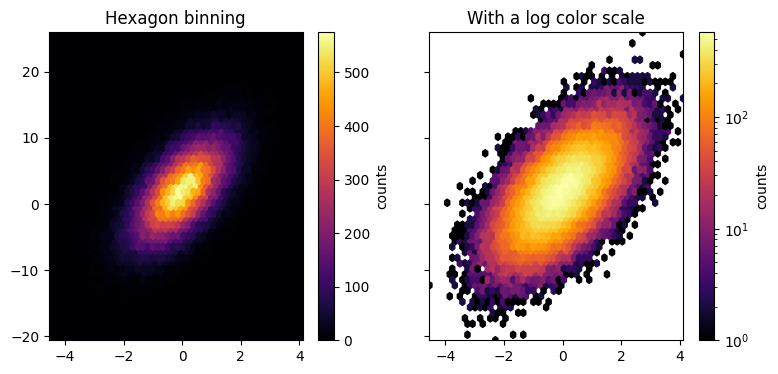

In [22]:
%%testcelln
# FROM: https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100_000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='counts')

In [23]:
# Note that matplotlib has not been importad in global scope
assert 'matplotlib' not in globals()

#### Data transformation testing

Test complex pandas pipelines without keeping intermediate results.

In [24]:
%%testcell
import pandas as pd
import numpy as np

df = pd.DataFrame({'values': global_list})
transformed = (df
    .assign(squared=lambda x: x['values']**2)
    .assign(log=lambda x: np.log(x['values']))
    .assign(normalized=lambda x: (x['values'] - x['values'].mean()) / x['values'].std())
)
transformed  # df and transformed don't leak

,values,squared,log,normalized
0,1,1,0.000000,-1.091089
1,2,4,0.693147,-0.872872
2,3,9,1.098612,-0.654654
3,5,25,1.609438,-0.218218
4,7,49,1.945910,0.218218
5,11,121,2.397895,1.091089
6,13,169,2.564949,1.527525


#### Statistical analysis sandbox

Run complex analyses without polluting namespace.

In [25]:
%%testcell
import numpy as np
import pandas as pd

data = np.random.normal(loc=50, scale=10, size=100)
stats = {
    'mean': np.mean(data),
    'median': np.median(data),
    'std': np.std(data),
    'q25': np.percentile(data, 25),
    'q75': np.percentile(data, 75)
}
pd.Series(stats)  # data and stats don't persist

mean      50.270582
median    50.717514
std        9.941437
q25       43.304636
q75       57.991124
dtype: float64

### Skip feature

#### A/B testing approaches

Toggle between different implementations without deleting code.

In [26]:
%%testcell
import numpy as np
# Approach A: using numpy
result = np.array(global_list).mean()
print(f"Approach A result: {result}")

Approach A result: 6.0


In [27]:
%%testcell skip
# Approach B: pure python (currently disabled)
result = sum(global_list) / len(global_list)
print(f"Approach B result: {result}")

ℹ️ This cell has been skipped

#### Disable expensive operations

Skip time-consuming cells during development iteration.

In [28]:
%%testcell skip
import numpy as np
import matplotlib.pyplot as plt

# Expensive simulation - skip while working on other parts
data = np.random.randn(1000000)
for i in range(100):
    data = data * np.random.random() + np.random.randn(1000000)
plt.hist(data, bins=50)
plt.show()

ℹ️ This cell has been skipped

#### Conditional cell execution with global_skip

Disable all testcell cells at once for production runs.

In [29]:
# Enable this to skip all %%testcell cells
testcell.global_skip = True

In [30]:
%%testcell
print("This won't execute when global_skip is True")

ℹ️ This cell has been skipped

In [31]:
# Reset for other examples
testcell.global_skip = False

#### Iterative development in Colab/Modal

Skip cells in platforms without native "Raw cell" type.

In [32]:
%%testcell skip
# Work-in-progress code that's not ready yet
# Colab/Kaggle/Modal don't have "Raw" cells, so this is perfect
import pandas as pd
experimental_feature = pd.DataFrame(global_list)
# TODO: finish this later

ℹ️ This cell has been skipped

### Complete isolation (noglobals/testcelln)

#### Pure function testing

Verify functions work without global dependencies.

In [33]:
%%testcelln
import numpy as np

# Define and test a pure function
def calculate_stats(values):
    return {
        'mean': np.mean(values),
        'std': np.std(values),
        'sum': np.sum(values)
    }

# Test with local data
calculate_stats([1, 2, 3, 4, 5])

{'mean': np.float64(3.0),
 'std': np.float64(1.4142135623730951),
 'sum': np.int64(15)}

#### Detect hidden dependencies

Catch when code accidentally relies on globals.

In [34]:
%%testcelln
import pandas as pd

# This will fail - exposes dependency on global_list
def process_data():
    return pd.Series(global_list).describe()

try:
    process_data()
except NameError as e:
    print(f"Caught dependency: {e}")

Caught dependency: name 'global_list' is not defined


#### Clean slate execution

Run code with only `__builtins__` available.

In [35]:
%%testcelln
# Verify truly isolated environment
available = list(globals().keys())
print(f"Only available: {available}")
print(f"Can use built-ins like sum: {sum([1,2,3])}")

Only available: ['__builtins__']
Can use built-ins like sum: 6


#### Reproducibility verification

Ensure code doesn't rely on notebook state.

In [36]:
%%testcelln
import numpy as np
import pandas as pd

# Self-contained analysis - no hidden dependencies
data = [1, 2, 3, 5, 7, 11, 13]
df = pd.DataFrame({'values': data})
df['normalized'] = (df['values'] - df['values'].mean()) / df['values'].std()
df

,values,normalized
0,1,-1.091089
1,2,-0.872872
2,3,-0.654654
3,5,-0.218218
4,7,0.218218
5,11,1.091089
6,13,1.527525


### (input)->(output) syntax

#### Controlled input to isolated cell

Pass specific variables to noglobals context without full access.

In [37]:
%%testcelln (global_list)
import numpy as np

# Only global_list is available
squared = [x**2 for x in global_list]
np.mean(squared)

np.float64(54.0)

#### Safe experimentation with expensive state

Protect important objects while experimenting - pass them in, don't leak experiments out.

In [38]:
import numpy as np
expensive_model = np.random.randn(1000, 1000)  # Pretend this took hours to compute

In [39]:
%%testcelln (expensive_model)
import numpy as np

# Experiment safely - expensive_model is read-only here
test_input = np.random.randn(1000)
prediction = expensive_model @ test_input
temp_analysis = prediction.mean()
print(f"Test prediction mean: {temp_analysis}")
# temp_analysis and test_input don't leak

Test prediction mean: 0.915797933814531


In [40]:
# Cleanup
del expensive_model 

#### Selective output saving

Save only specific results back to globals.

In [41]:
%%testcelln (global_list)->(final_result, summary_stats)
import pandas as pd

# Complex processing with many intermediate variables
df = pd.DataFrame({'values': global_list})
df['squared'] = df['values'] ** 2
df['cubed'] = df['values'] ** 3
intermediate = df.describe()

# Only these two are saved to globals
final_result = df[['values', 'squared']].copy()
summary_stats = {'mean': df['values'].mean(), 'max': df['values'].max()}

final_result

,values,squared
0,1,1
1,2,4
2,3,9
3,5,25
4,7,49
5,11,121
6,13,169


In [42]:
# Verify only selected outputs exist
print(f"final_result exists: {'final_result' in globals()}")
print(f"summary_stats exists: {'summary_stats' in globals()}")
print(f"df exists: {'df' in globals()}")  # Should be False

# Cleanup
del final_result, summary_stats

final_result exists: True
summary_stats exists: True
df exists: False


### Advanced scenarios

#### Benchmark alternatives without variable collision

Compare implementations safely - variables from different approaches don't collide, ensuring fair comparison.

In [43]:
%%testcell
import numpy as np

# Approach 1: using numpy operations
data = np.array(global_list)
result = data.mean() + data.std()
print(f"Approach 1 result: {result}")

Approach 1 result: 10.242640687119284


In [44]:
%%testcell
import numpy as np

# Approach 2: slightly different calculation
# 'data' and 'result' from previous cell don't interfere
data = np.array(global_list)
result = np.mean(data) + np.std(data, ddof=1)  # Using sample std
print(f"Approach 2 result: {result}")

Approach 2 result: 10.582575694955839


#### Complex fixture extraction with complete isolation

Test in complete isolation, but extract test results to main context for later use.

In [45]:
%%testcelln ->(test_suite) debug
import pandas as pd
import numpy as np

# Create test fixtures in isolation - no access to any globals
test_data = pd.DataFrame({
    'values': [1, 2, 3, 5, 7, 11, 13],
    'doubled': [2, 4, 6, 10, 14, 22, 26]
})

test_suite = {
    'data': test_data,
    'validators': [lambda x: x > 0, lambda x: x < 100],
    'summary': test_data.describe().to_dict()
}

test_suite['data'].head()

```python
### BEGIN
def _test_cell_():
	global test_suite
	import pandas as pd
	import numpy as np
	
	# Create test fixtures in isolation - no access to any globals
	test_data = pd.DataFrame({
	    'values': [1, 2, 3, 5, 7, 11, 13],
	    'doubled': [2, 4, 6, 10, 14, 22, 26]
	})
	
	test_suite = {
	    'data': test_data,
	    'validators': [lambda x: x > 0, lambda x: x < 100],
	    'summary': test_data.describe().to_dict()
	}
	
	return test_suite['data'].head() # %%testcell
try:
	_ = _test_cell_()
finally:
	del _test_cell_
if _ is not None: display(_)
### END
```

,values,doubled
0,1,2
1,2,4
2,3,6
3,5,10
4,7,14


```python
### GLOBALS UPDATE CODE:
global test_suite; test_suite=locals()["test_suite"]
###
```

In [46]:
# test_suite now available in main context
print(f"Test suite keys: {test_suite.keys()}")
del test_suite  # Cleanup

Test suite keys: dict_keys(['data', 'validators', 'summary'])


#### Pipeline validation during refactoring

Test two pipeline versions produce identical results - crucial when refactoring to ensure behavior doesn't change.

In [47]:
%%testcelln (global_list)->(pipeline_v1)
import pandas as pd

def pipeline_v1(data):
    df = pd.DataFrame({'values': data})
    df['doubled'] = df['values'] * 2
    df['normalized'] = (df['doubled'] - df['doubled'].mean()) / df['doubled'].std()
    return df

pipeline_v1(global_list)

,values,doubled,normalized
0,1,2,-1.091089
1,2,4,-0.872872
2,3,6,-0.654654
3,5,10,-0.218218
4,7,14,0.218218
5,11,22,1.091089
6,13,26,1.527525


In [48]:
%%testcelln (global_list)->(pipeline_v2)
import pandas as pd
import numpy as np

def pipeline_v2(data):
    # Refactored version - more efficient
    df = pd.DataFrame({'values': data})
    doubled = np.array(df['values']) * 2
    df['doubled'] = doubled
    df['normalized'] = (doubled - doubled.mean()) / doubled.std()
    return df

pipeline_v2(global_list)

,values,doubled,normalized
0,1,2,-1.178511
1,2,4,-0.942809
2,3,6,-0.707107
3,5,10,-0.235702
4,7,14,0.235702
5,11,22,1.178511
6,13,26,1.649916


In [49]:
%%testcell
# Inspect differences
import pandas as pd
(pipeline_v1(global_list) - pipeline_v2(global_list)).style.background_gradient(cmap='viridis', subset=['normalized'])

,values,doubled,normalized
0,0,0,0.087422
1,0,0,0.069937
2,0,0,0.052453
3,0,0,0.017484
4,0,0,-0.017484
5,0,0,-0.087422
6,0,0,-0.122391


In [50]:
# Cleanup
del pipeline_v1, pipeline_v2

#### Debugging global pollution and dependencies

Same code behaves differently with testcell vs testcelln - exposes hidden dependency on global scope.

In [51]:
# Set up a variable that code might accidentally depend on
scale_factor = 10

In [52]:
%%testcell
import numpy as np

# This works - has access to scale_factor
data = np.array(global_list) * scale_factor
data.mean()

np.float64(60.0)

In [53]:
%%testcelln
import numpy as np

# This fails - exposes the hidden dependency
try:
    data = np.array([1,2,3,5,7,11,13]) * scale_factor
    data.mean()
except NameError as e:
    print(f"❌ Hidden dependency detected: {e}")
    print("Code relies on 'scale_factor' from global scope!")

❌ Hidden dependency detected: name 'scale_factor' is not defined
Code relies on 'scale_factor' from global scope!


In [54]:
# Cleanup
del scale_factor